<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/VAR_Value_at_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install PyPortfolioOpt

# **VAR - Value at risk**

In [149]:
import yfinance as yf ,numpy as np, datetime as dt, matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [150]:
tickers = ["CVX","AAPL","AMZN","KO","WMT","JPM","VOO"]

In [151]:
Start = dt.datetime(2019,1,1)
end_1 = dt.datetime(2022,12,10)
end = dt.datetime.now()

df = yf.download(tickers,Start,end)["Adj Close"]
df=df.dropna()
df

[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,CVX,JPM,KO,VOO,WMT
Date,,,,,,,
2019-01-02,38.105137,76.956497,92.325310,87.878349,41.413990,215.675171,87.205589
2019-01-03,34.309578,75.014000,90.557037,86.629440,41.158077,210.526901,86.757149
2019-01-04,35.774239,78.769501,92.433731,89.823082,41.978767,217.475677,87.299042
2019-01-07,35.694607,81.475502,93.634842,89.885529,41.431644,219.107361,88.326729
2019-01-08,36.375061,82.829002,93.226112,89.716034,41.899345,221.236069,88.943352
...,...,...,...,...,...,...,...
2022-12-05,146.630005,91.010002,176.559998,131.369995,63.470001,367.339996,151.080460
2022-12-06,142.910004,88.250000,172.009995,131.589996,63.439999,362.029999,149.327072
2022-12-07,140.940002,88.459999,172.520004,131.500000,63.540001,361.329987,148.550003


In [152]:
df.describe()
df.tail

<bound method NDFrame.tail of                   AAPL       AMZN         CVX         JPM         KO  \
Date                                                                   
2019-01-02   38.105137  76.956497   92.325310   87.878349  41.413990   
2019-01-03   34.309578  75.014000   90.557037   86.629440  41.158077   
2019-01-04   35.774239  78.769501   92.433731   89.823082  41.978767   
2019-01-07   35.694607  81.475502   93.634842   89.885529  41.431644   
2019-01-08   36.375061  82.829002   93.226112   89.716034  41.899345   
...                ...        ...         ...         ...        ...   
2022-12-05  146.630005  91.010002  176.559998  131.369995  63.470001   
2022-12-06  142.910004  88.250000  172.009995  131.589996  63.439999   
2022-12-07  140.940002  88.459999  172.520004  131.500000  63.540001   
2022-12-08  142.649994  90.349998  173.539993  132.880005  63.810001   
2022-12-09  142.160004  89.089996  168.000000  132.160004  63.139999   

                   VOO         WM

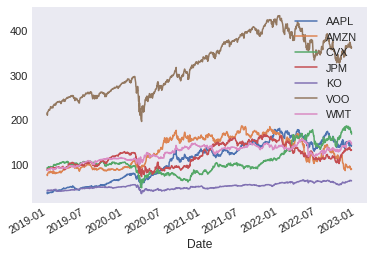

In [153]:
df.plot()
plt.show()

,AAPL,AMZN,CVX,JPM,KO,VOO,WMT
Date,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099608,-0.025241,-0.019153,-0.014212,-0.006179,-0.023870,-0.005142
2019-01-04,0.042690,0.050064,0.020724,0.036866,0.019940,0.033007,0.006246
2019-01-07,-0.002226,0.034353,0.012994,0.000695,-0.013033,0.007503,0.011772
2019-01-08,0.019063,0.016612,-0.004365,-0.001886,0.011288,0.009715,0.006981
...,...,...,...,...,...,...,...
2022-12-05,-0.007983,-0.033146,-0.024692,-0.028041,-0.013675,-0.017807,-0.010247
2022-12-06,-0.025370,-0.030326,-0.025770,0.001675,-0.000473,-0.014455,-0.011606
2022-12-07,-0.013785,0.002380,0.002965,-0.000684,0.001576,-0.001934,-0.005204


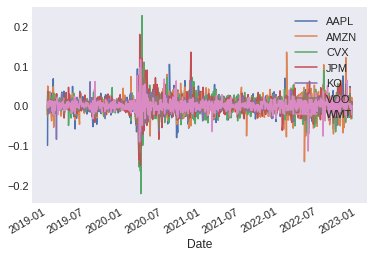

In [154]:
retourns = df.pct_change() # Retornos 
retourns.plot()
retourns

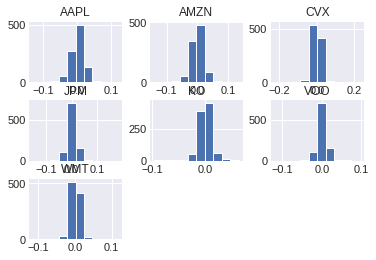

In [155]:
retourns.hist() # Histograma Retornos
plt.show()

In [156]:
cov_matrix = retourns.cov() # Matriz de varianzas y Covarianzas 
cov_matrix 

,AAPL,AMZN,CVX,JPM,KO,VOO,WMT
AAPL,0.000474,0.000319,0.000196,0.000221,0.000143,0.000254,0.000128
AMZN,0.000319,0.000507,0.000117,0.000148,0.000088,0.000213,0.000110
CVX,0.000196,0.000117,0.000576,0.000344,0.000164,0.000221,0.000074
JPM,0.000221,0.000148,0.000344,0.000467,0.000177,0.000235,0.000089
KO,0.000143,0.000088,0.000164,0.000177,0.000211,0.000140,0.000084
VOO,0.000254,0.000213,0.000221,0.000235,0.000140,0.000209,0.000102
WMT,0.000128,0.000110,0.000074,0.000089,0.000084,0.000102,0.000219


In [157]:
corr = retourns.corr() # correlaciones 
corr

,AAPL,AMZN,CVX,JPM,KO,VOO,WMT
AAPL,1.000000,0.650965,0.375823,0.469304,0.451370,0.808542,0.395657
AMZN,0.650965,1.000000,0.215681,0.304313,0.270171,0.654952,0.329103
CVX,0.375823,0.215681,1.000000,0.662588,0.471840,0.637920,0.209813
JPM,0.469304,0.304313,0.662588,1.000000,0.564219,0.752379,0.279206
KO,0.451370,0.270171,0.471840,0.564219,1.000000,0.667301,0.391929
VOO,0.808542,0.654952,0.637920,0.752379,0.667301,1.000000,0.478607
WMT,0.395657,0.329103,0.209813,0.279206,0.391929,0.478607,1.000000


In [158]:
avg_retorns = retourns.mean() # Promedio de retornos 
avg_retorns

AAPL    0.001564
AMZN    0.000401
CVX     0.000894
JPM     0.000643
KO      0.000531
VOO     0.000625
WMT     0.000624
dtype: float64

In [159]:
count = retourns.count() # Numero de retornos 
count

AAPL    993
AMZN    993
CVX     993
JPM     993
KO      993
VOO     993
WMT     993
dtype: int64

# **Portafolio Eficiente**

In [183]:
acoes = ["CVX","AAPL","AMZN","KO"]
carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i,Start,end_1,interval="1d")['Adj Close']
carteira=carteira.dropna()
carteira.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CVX,AAPL,AMZN,KO
Date,,,,
2022-12-05,176.559998,146.630005,91.010002,63.470001
2022-12-06,172.009995,142.910004,88.250000,63.439999
2022-12-07,172.520004,140.940002,88.459999,63.540001
2022-12-08,173.539993,142.649994,90.349998,63.810001
2022-12-09,168.000000,142.160004,89.089996,63.139999


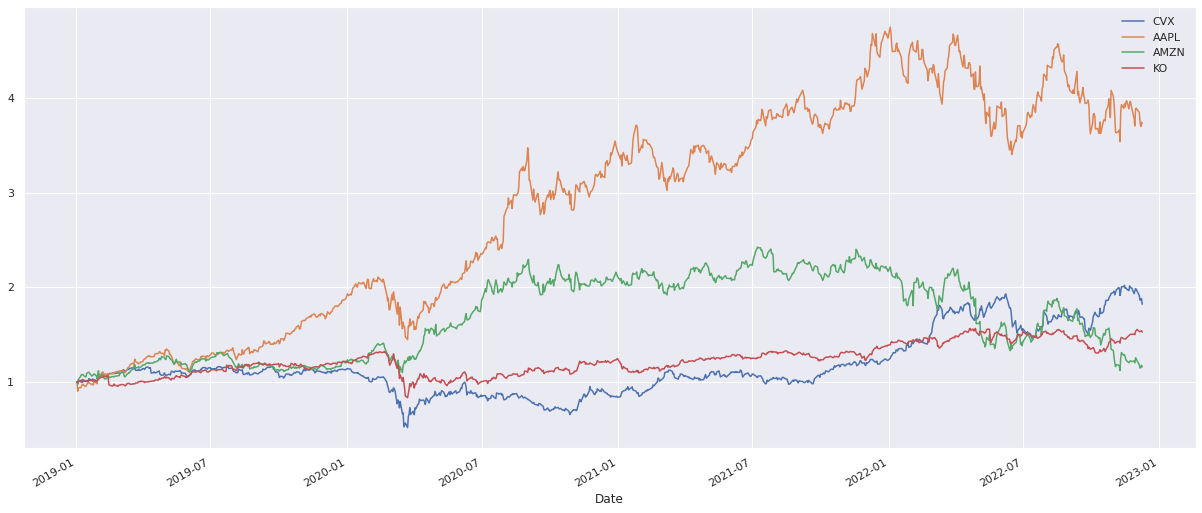

In [161]:
sns.set()
carteira_normalizada = carteira/carteira.iloc[0]
carteira_normalizada.plot(figsize=(21,9))

In [162]:
retorno = carteira.pct_change()
retorno

,CVX,AAPL,AMZN,KO
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.019153,-0.099607,-0.025241,-0.006179
2019-01-04,0.020724,0.042689,0.050064,0.019940
2019-01-07,0.012994,-0.002226,0.034353,-0.013034
2019-01-08,-0.004365,0.019063,0.016612,0.011289
...,...,...,...,...
2022-12-05,-0.024692,-0.007983,-0.033146,-0.013675
2022-12-06,-0.025770,-0.025370,-0.030326,-0.000473
2022-12-07,0.002965,-0.013785,0.002380,0.001576


In [163]:
retorno_anual = retorno.mean() 
retorno_anual

CVX     0.000894
AAPL    0.001564
AMZN    0.000401
KO      0.000531
dtype: float64

In [164]:
cov = retorno.cov() 
cov

,CVX,AAPL,AMZN,KO
CVX,0.000576,0.000196,0.000117,0.000164
AAPL,0.000196,0.000474,0.000319,0.000143
AMZN,0.000117,0.000319,0.000507,0.000088
KO,0.000164,0.000143,0.000088,0.000211


In [165]:
corr = retorno.corr()
corr

,CVX,AAPL,AMZN,KO
CVX,1.000000,0.375823,0.215681,0.471839
AAPL,0.375823,1.000000,0.650965,0.451370
AMZN,0.215681,0.650965,1.000000,0.270171
KO,0.471839,0.451370,0.270171,1.000000


In [166]:
num_acoes = len(acoes)
num_carteiras = 10000

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [167]:
for carteira in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [168]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,CVX Peso,AAPL Peso,AMZN Peso,KO Peso
0,0.000932,0.017830,0.052282,0.116635,0.398578,0.405102,0.079684
1,0.000883,0.017677,0.049968,0.292700,0.289799,0.407755,0.009746
2,0.000714,0.015773,0.045236,0.391408,0.076958,0.298409,0.233224
3,0.000745,0.015577,0.047817,0.420944,0.072358,0.103671,0.403028
4,0.000825,0.015320,0.053882,0.309419,0.202831,0.208660,0.279091
...,...,...,...,...,...,...,...
9995,0.000610,0.013610,0.044825,0.074068,0.064710,0.111924,0.749299
9996,0.000731,0.014038,0.052070,0.199522,0.140683,0.135333,0.524462
9997,0.001089,0.018770,0.058021,0.057607,0.561081,0.325110,0.056202
9998,0.000805,0.015362,0.052410,0.378368,0.142413,0.077857,0.401362


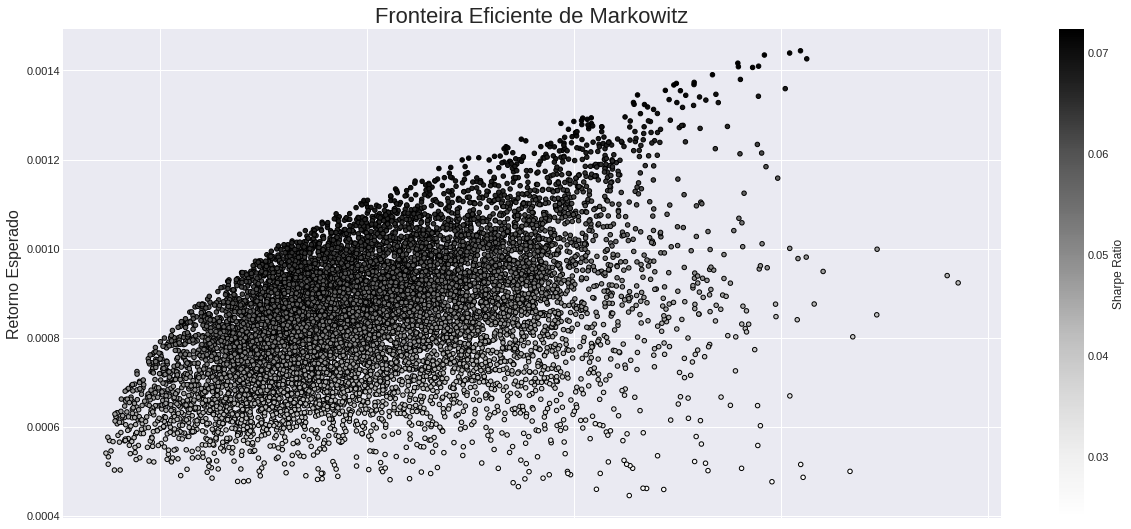

In [169]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black', figsize=(21,9), grid=True)
plt.xlabel('Volatilidade', fontsize=16)
plt.ylabel('Retorno Esperado', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=22)
plt.savefig('Fronteira.png', dpi = 500)

In [170]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,9725
Retorno,0.000541
Volatilidade,0.013479
Sharpe Ratio,0.040117
CVX Peso,0.041472
AAPL Peso,0.022389
AMZN Peso,0.217748
KO Peso,0.718391


In [171]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,7638
Retorno,0.001416
Volatilidade,0.019582
Sharpe Ratio,0.072331
CVX Peso,0.150223
AAPL Peso,0.805567
AMZN Peso,0.008795
KO Peso,0.035415


In [185]:
CVXL = carteira["CVX"]*carteira_min_variancia["CVX Peso"].values

In [186]:
AAPL=carteira["AAPL"]*carteira_min_variancia["AAPL Peso"].values
AMZN=carteira["AMZN"]*carteira_min_variancia["AMZN Peso"].values
KO=carteira["KO"]*carteira_min_variancia["KO Peso"].values

In [187]:
Portafolio = KO+AMZN+AAPL+CVX

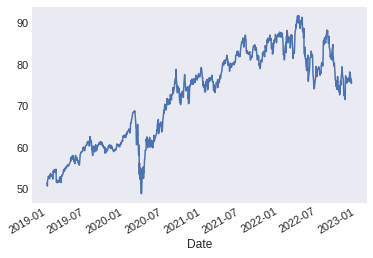

In [188]:
Portafolio.plot()

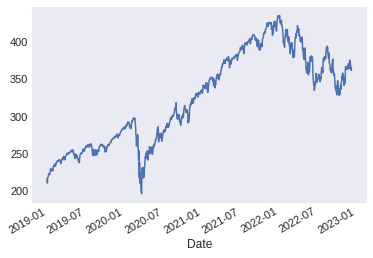

In [189]:
df.VOO.plot()